# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [3]:
# Import libraries and alias for easy reading
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Read data
df = pd.read_excel("Online Retail.xlsx")

In [4]:
# Preview first five rows of dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Shape of the data
df.shape

(541909, 8)

In [6]:
# Summariesed information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# find the null values for all the columns
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Percentage of missing values
df.isnull().sum()/len(df)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

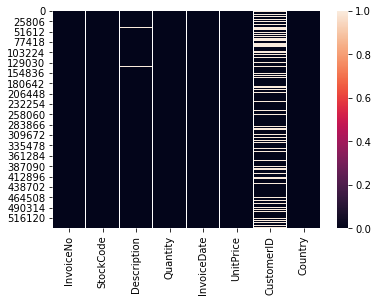

In [9]:
sns.heatmap(df.isnull())

The count of missing values for CustomerId can not be neglected as considerable data is missing, so I'll replace them with the string 'Unknown', however for Description null values are negligible so I'll just drop those values.


## Task 2: Data Cleaning

In [13]:
#Replace null CustomerID's with unknown
df['CustomerID'].replace(np.nan,"Unknown",inplace=True)

In [14]:
#Replace null description with not available
df.dropna(subset=['Description'],inplace=True)

In [15]:
df.shape

(540455, 8)

#### Removing Redundant or Unnecessary Columns 

In [16]:
df.drop(["InvoiceNo","StockCode"],axis=1,inplace=True)

In [17]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [18]:
df.duplicated().sum()

5923

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

In [21]:
# Calculate Total sell amount
df['Totalsell'] = df['Quantity']*df['UnitPrice']

In [22]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsell
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Task 3: Statistical Summary

In [23]:
df.describe()

,Quantity,UnitPrice,Totalsell
count,534532.000000,534532.000000,534532.000000
mean,9.701713,4.644063,18.184379
std,218.789309,97.424304,381.403007
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.900000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000


Having a negative quantity of a product in a dataset typically indicates that there was a return or a product was taken back from the customer, likewise for unitprice, a negative value would imply that refunds were made.



In [24]:
# Calculate measure of central tendency
median = df.median()

In [25]:
median

Quantity     3.00
UnitPrice    2.08
Totalsell    9.90
dtype: float64

The mean for Totalsell is greater than the median, which indicates that the data may be right-skewed (positively skewed), and vice versa for left-skewed (negatively skewed) data.

In [26]:
# Create a new column 'MonthYear' with the month and year
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')

In [27]:
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsell,MonthYear
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12


## Task 4: Data Visualization

In [28]:
monthly_data = df.groupby('MonthYear')['Totalsell'].sum().reset_index()
monthly_data['MonthYear'] = monthly_data['MonthYear'].astype(str)

Text(0, 0.5, 'TotalSell')

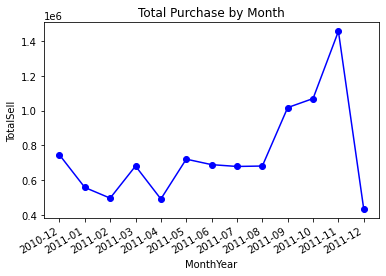

In [29]:
fig, ax = plt.subplots(figsize=(6,4))
fig.autofmt_xdate()
plt.plot(monthly_data['MonthYear'],monthly_data['Totalsell'],marker='o',linestyle='-',color='b')
plt.title("Total Purchase by Month")
plt.xlabel("MonthYear")
plt.ylabel("TotalSell")



From the line plot of monthly sales it can be clearly seen that there is a significant rise in sales from august to november, then it drops in December 2011.


,Quantity,UnitPrice,Totalsell
Quantity,1.000000,-0.001261,0.889831
UnitPrice,-0.001261,1.000000,-0.162052
Totalsell,0.889831,-0.162052,1.000000


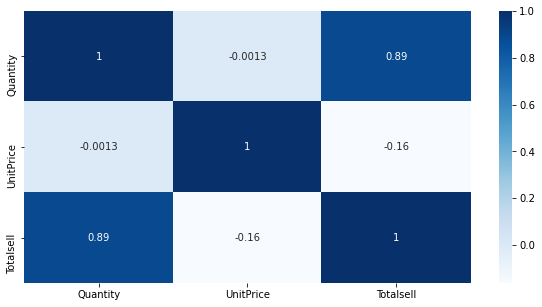

In [30]:
plt.figure(figsize=(10,5))
corr = df.corr()
sns.heatmap(corr,cmap='Blues',annot=True)
corr

## Task 4: Sales Trends over time 

In [31]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsell,MonthYear
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [32]:
#Extract the month from the 'InvoiceDate'
df['Month'] = df['InvoiceDate'].dt.month

#Extract the day of week 
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

#Total sales for each moth 
monthly_sales = df.groupby('Month')['Totalsell'].sum()

#Calculate total sales for each day of week
daily_sales = df.groupby('DayOfWeek')['Totalsell'].sum()

#Identify the busiest month
busiest_month = monthly_sales.idxmax()

#Identify busiest day of week
busiest_day = daily_sales.idxmax()

#Print the result 
print("Busiest Month(in terms of sells:",busiest_month)
print("Busiest Day of Week:",busiest_day)

Busiest Month(in terms of sells: 11
Busiest Day of Week: Thursday


Text(0.5, 1.0, 'Sales Trend by Day of week')

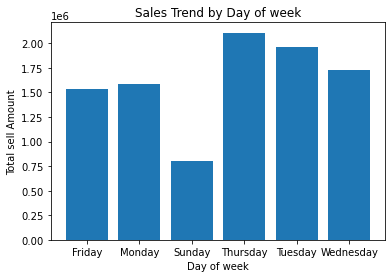

In [33]:
plt.figure(figsize=(6,4))
plt.bar(daily_sales.index, daily_sales.values)
plt.xlabel("Day of week")
plt.ylabel("Total sell Amount")
plt.title('Sales Trend by Day of week')

## Task 6: Top-Selling Products and Countries

In [39]:
#Find the most valueable items in the list
items_total_sell = df.groupby('Description')['Totalsell'].sum()
#sort the items based on the total sells in ascending order
most_valuable_item = items_total_sell.sort_values(ascending=False)

#Convert series to dataframe
most_valuable_item_df = pd.DataFrame(most_valuable_item,columns=['Totalsell']).reset_index()

#Count number of items
total_items = df['Description'].nunique()

# Print the total number of Items and the top 10 items
print('\033[1m' + f"Among {total_items} items, the 10 most valuable items are:" +'\033[0m', list(most_valuable_item_df['Description'][:10]))

Among 4223 items, the 10 most valuable items are: ['DOTCOM POSTAGE', 'REGENCY CAKESTAND 3 TIER', 'WHITE HANGING HEART T-LIGHT HOLDER', 'PARTY BUNTING', 'JUMBO BAG RED RETROSPOT', 'RABBIT NIGHT LIGHT', 'POSTAGE', "PAPER CHAIN KIT 50'S CHRISTMAS ", 'ASSORTED COLOUR BIRD ORNAMENT', 'CHILLI LIGHTS']


In [41]:
#Find country most sell in the list
countrywise_sell = df.groupby('Country')['Totalsell'].sum()

#sort countries based on the total sells in ascending order
top_selling_country = countrywise_sell.sort_values(ascending=False)

#Convert series to dataframe
top_selling_country_df = pd.DataFrame(top_selling_country,columns=['Totalsell']).reset_index()

#Count number of items
total_countries = df['Country'].nunique()

# Print the total number of Items and the top 10 items
print('\033[1m' + f"Among {total_countries} Countries, the top-10 selling countries are:" +'\033[0m', list(top_selling_country_df['Country'][:10]))

Among 38 items, the 10 most valuable items are: ['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France', 'Australia', 'Switzerland', 'Spain', 'Belgium', 'Sweden']


Here, knowing the most valuable items ('DOTCOM POSTAGE', 'REGENCY CAKESTAND 3 TIER','PARTY BUNTING'....) and top selling countries ('United Kingdom', 'Netherlands', 'EIRE'...), we can make data-driven decisions, optimize operations, and stay competitive in the market. It provides critical insights into customer behavior, market trends, and business performance, allowing companies to better serve their customers and achieve long-term success.


## Task 7: Identifying Outliers

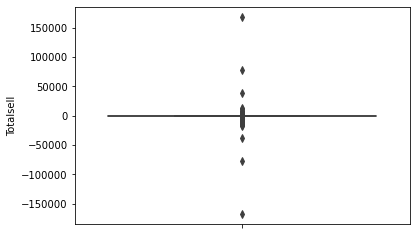

In [43]:
sns.boxplot(data=df,y='Totalsell')
plt.show()

In [45]:
from scipy import stats

z_score = stats.zscore(df['Totalsell'])
threshold = 3
outlier_mask = abs(z_score) > threshold

outliers = df[outlier_mask]
outliers.shape

(396, 10)

#### Removing Outliers

In [46]:
without_outlier_df = df[~outlier_mask]

In [48]:
without_outlier_df.describe()

,Quantity,UnitPrice,Totalsell,Month
count,534136.000000,534136.000000,534136.000000,534136.000000
mean,9.408417,3.813369,17.671839,7.549877
std,47.548170,15.533642,44.696246,3.508392
min,-9600.000000,0.000000,-1126.000000,1.000000
25%,1.000000,1.250000,3.750000,5.000000
50%,3.000000,2.080000,9.900000,8.000000
75%,10.000000,4.130000,17.400000,11.000000
max,12540.000000,1154.670000,1158.000000,12.000000


In [49]:
# with outlier
df.describe()

,Quantity,UnitPrice,Totalsell,Month
count,534532.000000,534532.000000,534532.000000,534532.000000
mean,9.701713,4.644063,18.184379,7.550111
std,218.789309,97.424304,381.403007,3.508284
min,-80995.000000,-11062.060000,-168469.600000,1.000000
25%,1.000000,1.250000,3.750000,5.000000
50%,3.000000,2.080000,9.900000,8.000000
75%,10.000000,4.130000,17.400000,11.000000
max,80995.000000,38970.000000,168469.600000,12.000000


With Outliers (std = 218) and Without Outliers (std = 50)

The significant difference in standard deviation implies that the outliers have a substantial impact on the overall variability of the data. Removing the outliers has resulted in a more focused and less variable dataset.


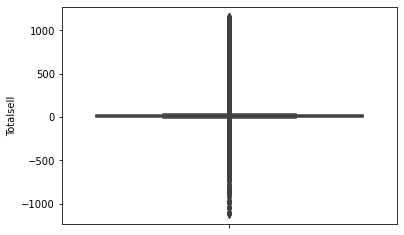

In [53]:
# boxplot without outliers
sns.boxplot(data=without_outlier_df,y='Totalsell')
plt.show()

While considering the context of the data and the goals of the analysis we can not remove the outliers as it will have potential implications on the analysis. Here outliers might represents valuable or rare events that may carry essential information, which might impact the results of overall analysis.


## Task 8: Conclusion 

- The mean for Totalsell is greater than the median, which indicates that the data may be right-skewed (positively skewed), and vice versa for left-skewed (negatively skewed) data.

- Busiest Day of week (in terms of sales) is Thursday

- Understanding the performance of products and sales in different regions can lead to better decision-making, improved marketing strategies, and overall business growth. 

 

Here, knowing the most valuable items ('DOTCOM POSTAGE', 'REGENCY CAKESTAND 3 TIER','PARTY BUNTING'....) and top selling countries ('United Kingdom', 'Netherlands', 'EIRE'...), we can make data-driven decisions, optimize operations, and stay competitive in the market. It provides critical insights into customer behavior, market trends, and business performance, allowing companies to better serve their customers and achieve long-term success.

